In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.simplefilter("ignore")

In [27]:
# Load the dataset
df = pd.read_csv("data/house_data.csv")

In [28]:
# Display sample data
print(df.head())

           id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_liv

In [29]:
print(df.shape)

(21613, 21)


In [30]:
# Drop columns that are not necessary for analysis, like 'id' and 'date'
df = df.drop(['id', 'date'], axis=1)
print(df.shape)

(21613, 19)


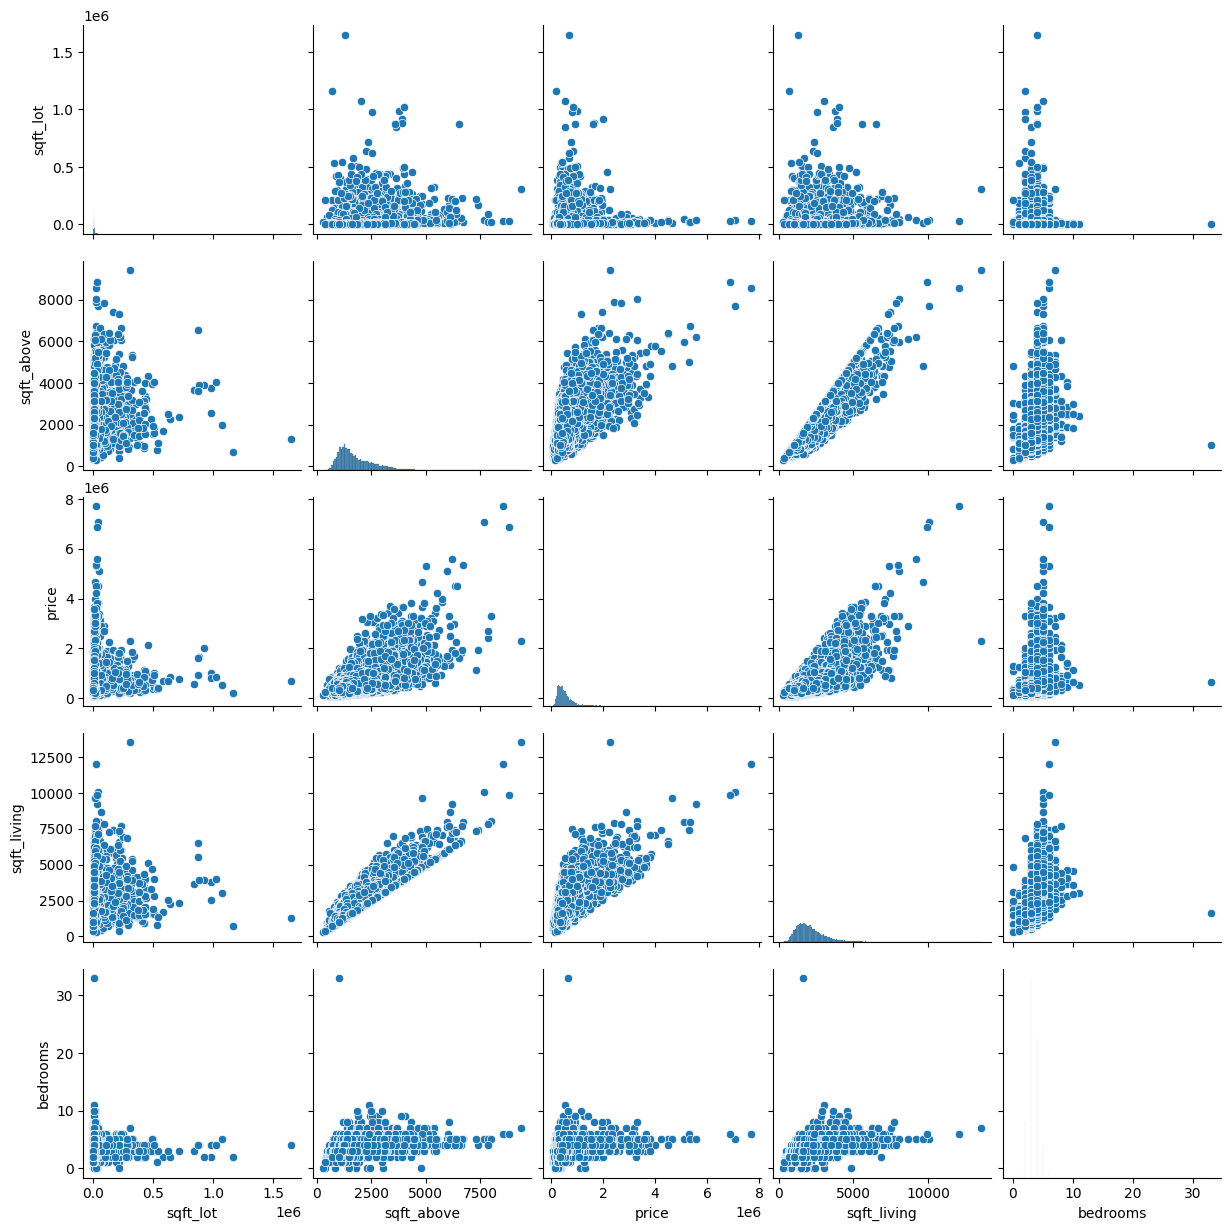

In [31]:
# Visualize data distribution and relationships with pairplot
sns.pairplot(df[['sqft_lot', 'sqft_above', 'price', 'sqft_living', 'bedrooms']])
# Display the plot
plt.show()

In [32]:
# Extract the target variable (price) and display its size
target = df['price'].values
print("Target vector size:", target.shape[0])

Target vector size: 21613


In [33]:
# Drop the target column from the dataset
df = df.drop(['price'], axis=1)

In [34]:
features = df[['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']]
print(features.columns)


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


In [35]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardiser les caractéristiques
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Fit the Lasso model on the dataset without the 'normalize' parameter
lasso = Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
              positive=False, precompute=False, random_state=None,
              selection='cyclic', tol=0.0001, warm_start=False) 
lasso.fit(X, target)

# Display the fitted model parameters
print(lasso)
print("Lasso coefficients with alpha=0.2:", lasso.coef_)


Lasso(alpha=0.2)
Lasso coefficients with alpha=0.2: [-42852.60886572  33143.22860689 260590.06092992   6552.2102857
   5954.39380563  19022.01295393 118833.69918995 -79874.21399737
 -46201.01321812 -83169.68369073  14019.27854543 -25589.8674351
  77028.05147451 -35489.63209864  27613.77415729  -8927.03239686]


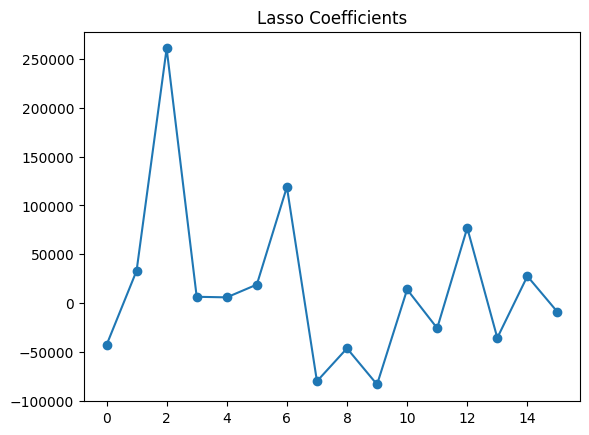

In [36]:
# Plot Lasso coefficients
plt.plot(lasso.coef_, marker='o')
plt.title("Lasso Coefficients")
plt.show()

Lasso coefficients with alpha=1.0: [-42851.61754667  33137.97668626 258732.57801824   6549.63033884
   5954.17851934  19021.12439964 118835.78981698 -78194.22061463
 -45302.43951818 -83168.16346664  14018.64549838 -25587.85439765
  77026.95577023 -35487.59550545  27608.92844373  -8924.81283877]


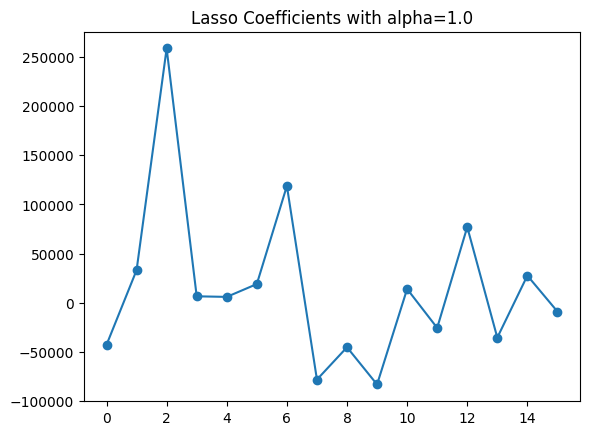

In [37]:
# Observe the effect of a different alpha value
lasso = Lasso(alpha=1.0)
lasso.fit(X, target)
print("Lasso coefficients with alpha=1.0:", lasso.coef_)

# Plot the new Lasso coefficients
plt.plot(lasso.coef_, marker='o')
plt.title("Lasso Coefficients with alpha=1.0")
plt.show()

Lasso coefficients with alpha=1000: [-40016.18026414  31372.09025117 164388.32175297   3005.62471505
   4685.59285348  18122.41126127 119391.21757218   5620.54937742
      0.         -81071.77555318  13506.38859532 -22741.92215911
  76019.14851945 -33288.60523132  26602.17166977  -5334.72167292]


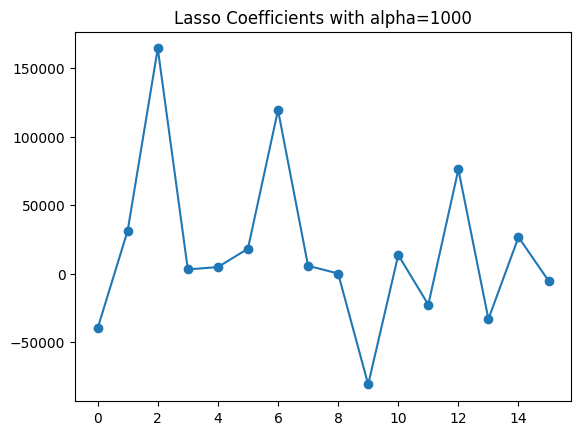

In [38]:
# Apply Lasso with a higher alpha value (e.g., alpha=1000)
lasso = Lasso(alpha=1000)
lasso.fit(X, target)
print("Lasso coefficients with alpha=1000:", lasso.coef_)

# Plot the new Lasso coefficients
plt.plot(lasso.coef_, marker='o')
plt.title("Lasso Coefficients with alpha=1000")
plt.show()

In [39]:
# Cross-validation for Lasso regression
lasso_cv_scores = cross_val_score(lasso, X, target, cv=5)
print("5-Fold CV Scores:", lasso_cv_scores)
print("Average 5-Fold CV Score:", np.mean(lasso_cv_scores))

5-Fold CV Scores: [0.64027783 0.65524031 0.66195618 0.67575137 0.65555589]
Average 5-Fold CV Score: 0.6577563158823567


Variance moyenne pour Ridge : 0.00027482486972669947


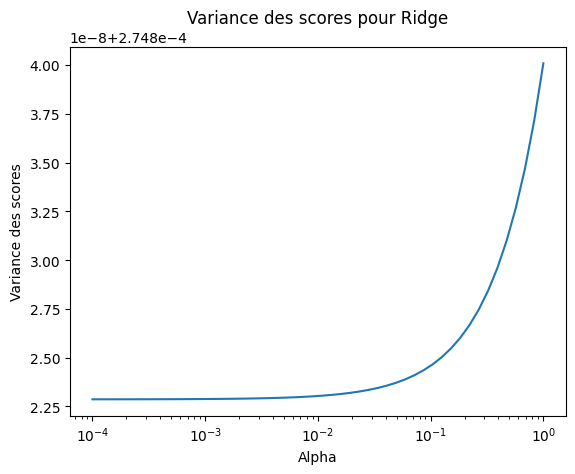

In [47]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Plage des valeurs alpha pour Ridge
alpha_space = np.logspace(-4, 0, 50)

ridge_cv_scores = []
ridge_variances = []

# Effectuer la validation croisée pour chaque alpha
for alpha in alpha_space:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X, target, cv=10)
    ridge_cv_scores.append(scores.mean())
    ridge_variances.append(scores.var())

# Calculer la variance moyenne
print("Variance moyenne pour Ridge :", np.mean(ridge_variances))

# Tracer la courbe de la variance des scores pour chaque alpha
import matplotlib.pyplot as plt
plt.plot(alpha_space, ridge_variances)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Variance des scores')
plt.title('Variance des scores pour Ridge')
plt.show()

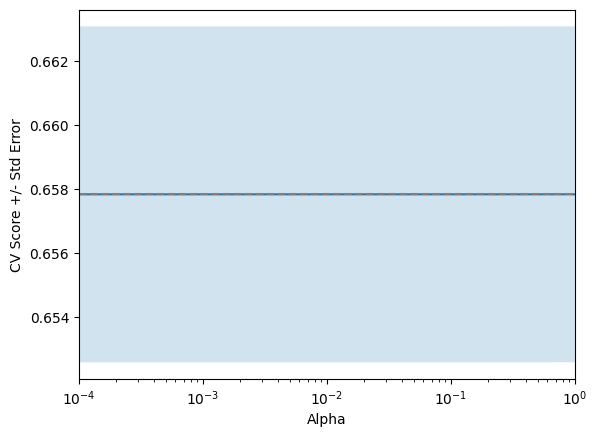

In [48]:
# Function to display the plot for Ridge CV Scores with std deviation
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Calculate standard deviation of Ridge scores and display the plot
display_plot(ridge_cv_scores, np.sqrt(ridge_variances))